*ქვემოთ მოცემული კოდი და ინსტრუქციები არ არის გათვლილი უბრალოდ დაინტერესებული ადამიანებისთვის. აუცილებელია მინიმალური ან საშუალო დონის გამოცდილება პითონის პროგრამირების ენაში, მინიმალური ან საშუალო დონის ცოდნა ხელოვნური ინტელექტის მოდელების ასაწყობად საჭირო, მათემატიკური პრერეკვიზიტებში და გარკვეული წარმოდგენა მანქანების სწავლებაზე.*


**საბაზისო დონის ხელოვნური ინტელექტი, სურათების კლასიფიკაციისთვის**

პირველ რიგში საჭიროა ტენსორფლოუს იმპორტირება. ამ შემთხვევაში მე ვიყენებ 2.x ვერსიას, შესაბამისად აუცილებლად გადაამოწმეთ რომ თქვენი ვერსიაც შესაბამისია. (თუ კოდს პირდაპირ Google colab_ში გაუშვებთ, მაშინ თან დაურთეთ %tensorflow_version 2.x, იმ შემთხვევაში თუ ლოკალურ გარემოში უშვებთ, ეს უკანასკნელი საჭირო აღარ არის)

დამატებით ვახდენთ კერასის იმპორტირებას, ტენსორფლოუს მაღალი დონის API რომელიც გამოიყენება მოდელების კონსტრუქციაში და გაწვრთნაში

ასევე ტენსორფლოუს განუყოფელი, პითონის სამეცნიერო ბიბლიოთეკა numpy და matplotlib, საბოლოოდ შედეგების ვიზუალიზაციისთვის.

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt

2.1.0


MNIST DATASET არის პოპულარული დატასეტი რომელიც შეიცავს 70,000, 28x28 პიქსელიან, სხვადასხვა ტიპის ტანსაცმლის სურათებს. 

60,000 სურათი გამოიყენება გაწვრთნისთვის და დანარჩენი 10,000 კი ტესტირებისთვის.

In [3]:
#კერასის დახმარებით შეგვიძლია მოცემული დატასეთი უმარტივესად გამოვწეროთ და ჩავტვირთოთ
fashion_mnist = keras.datasets.fashion_mnist

#ქვემოთ ვახდენთ ფოტოების და ლაბელების* გაყოფას - ტესტირებისთვის და გაწვრთნისთვის
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


*ლაბელებში მოიაზრება output-layer ის შედეგი რის გაგებასაც ხელოვნური ინტელექტის მოდელს ვთხოვთ. ამ შემთხვევაში გვაქვს 10 ლაბელი, ესენია მაგალითად ფეხსაცმელი, კაბა, მაისური და ა.შ თითოეულს შეესაბამება ერთი კონკრეტული ციფრი ნოლიდან ცხრამდე. 

0 -	T-shirt/top,
1 -	Trouser,
2 -	Pullover,
3 -	Dress,
4 -	Coat,
5 -	Sandal,
6 -	Shirt,
7 -	Sneaker,
8 -	Bag,
9 -	Ankle boot

შესაბამისად Features (რომლის შესაფერისი თარგმანი სამწუხაროდ არ მაქვს, მერე მოვიფიქრებ) არის ამ ტანსაცმლის სურათები ანუ input layer. კოდში train და test images

შემდეგ საჭიროა მონაცემების პრეპროცესირება. სურათებში პიქსელები წარმოდგენილია 0-255 დიაპაზონში. ეს ნიშნავს რომ 0 წარმოადგენს სრულიად შავ ფერს და 255 სრულიად თეთრ ფერს.

სანამ ამ სურათებით ჩვენს მოდელს "გამოვკვებავთ", საჭიროა პიქსელების დიაპაზონის შემცირება 0-255_დან 0-1_მდე.

In [0]:
#მარტივი მათემატიკა მოვიშველიოთ და ყველაფერი 255_ზე გავყოთ.
test_images = test_images/255.0
train_images = train_images/255.0

დატასეტი მზადაა მოდელის გამოსაკვებად. დროა თავად მოდელი ავაწყოთ.

ვითვალისწინებ რომ სანამ ამას წაიკითხავთ (თუ წაიკითხავთ;დ) წარმოდგენა უკვე გექნებათ როგორ მუშაობს ხელოვნური ინტელექტი, რა არის ნეირონული ბმები, რა არის შესასვლელი, დამალული და გამოსასვლელი ფენები და ა.შ 

ნეირონული ბმის ასაწყობად გამოვიყენოთ კერასის Sequential API_ს.

Sequential, ან როგორც მშობლიურ ენაზე, "რიგითი" მოდელი არის სტანდარტული, ფენების ლინეარული დასტა/წყობა. 

 keras.layers.Flatten დახმარებით 28x28 - ორგანზომილებიან მასივს, რომელიც წარმოადგენს სურათების პიქსელებს, გადავიყვანთ ერთ განზომილებიან მასივში, ანუ 28x28=784. შესაბამისად input-layer იქნება 784 ნეირონი.

 დამალული ფენა იქნება Dense ტიპის, ანუ მთლიანად დაკავშირებული 128 ნეირონი,რომლის აქტივაციისთვის გამოვიყენებთ, ფართოდ გამოყენებად Rectified Linear Unit_ს, შემოკლებით relu. (აქაც ვითვალისწინებ რომ გესმით რას ნიშნავს აქტივაცია)

ხოლო output-layer, გამოსასვლელი ფენა იქნება მთლიანად დაკავშირებული, Dense ტიპის 10 ნეირონი, რომლის აქტივაციისთვის გამოვიყენებთ softmax_ს. ეს უკანასკნელი უზრუნველყოფს იმას, რომ ნამდვილი ვექტორები გადავიდეს კატეგორიული ალბათობის ვექტორებში (და იმედი მაქვს შესაფერისი ტერმინები გამოვიყენე, ნუ ინგლისურად ინქება vectors of categorical propabilities)

ბოლო ფენა დაგვიბრუნებს 10 ალბათობით ქულის მასივს რომლების შეკრებითაც მივიღებთ 1_ს. ანუ, მოდელს ვანახებთ სურათს, ის კი გააკეთებს ალბათობებს და თითოეულ ნეირონზე გადაანაწილებს ალბათობით ქულებს.











In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #შესასვლელი ფენა 28*28=784 ნეირონით.
    keras.layers.Dense(128, activation='relu'), #დამალული ფენა 128 ნეირონით.
    keras.layers.Dense(10, activation='softmax') #გამოსასვლელი ფენა, 10 ნეირონით
])


მოდელის კომპელირება:

მოდელის კომპელირებისთვის საჭიროა სამი კომპონენტი - Loss function, optimizer და metrics.

Loss function - ზომავს რამდენად ზუსტი იყო მოდელი წვრთნის დროს, ამ შემთხვევაში გამოვიყენებთ SparseCategoricalCrossentropy ფუნქციას, მაგრამ არსებობს სხვა მრავალი, მაგალითად CosineSimilarity, MeanAbsoluteError და ა.შ tf.keras.losses მოდულით შეგიძლიათ ნებისმიერი გამოიყენოთ და თავად შეარჩიოთ მოდელისთვის შესაფერისი ფუნქცია. *რაც უფრო დაბალია loss value, მით უფრო მაღალია მოდელის სიზუსტე*

Optimizer - ოპტიმიზატორით ახლდება მოდელი მონაცემებზე და ლოს ფუნქციაზე დაყრდნობით, მოცემული მოდელისთვის გამოვიყენებთ "adam" ოპტიმიზატორს.

Metrics - ასე ვთქვათ ეს უკანასკნელი გამოიყენება წვრთნის და ტესტირების დროს მონიტირინგისთვის.


In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
#მოდელის გასაწრთვნელად გამოვიყენებთ 60,000 წინასწარ გამოყოფილ სურათს.
model.fit(train_images, train_labels, epochs=10) #epochs ნიშნავს იმას, თუ რამდენჯერ უნდა გადაიმეოროს მოდელმა საწვრთნელი სურათები. 
                                                #არასწორად შერჩეულმა epochs რაოდენობამ შეიძლება გამოიწვიოს მოდელის overlift ან underlift

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 94us/sample - loss: 1.6519 - accuracy: 0.8095
Epoch 2/10
60000/60000 [==============================] - 6s 97us/sample - loss: 1.6483 - accuracy: 0.8136
Epoch 3/10
60000/60000 [==============================] - 5s 91us/sample - loss: 1.6467 - accuracy: 0.8145
Epoch 4/10
60000/60000 [==============================] - 5s 90us/sample - loss: 1.6437 - accuracy: 0.8172
Epoch 5/10
60000/60000 [==============================] - 5s 89us/sample - loss: 1.6414 - accuracy: 0.8196
Epoch 6/10
60000/60000 [==============================] - 5s 90us/sample - loss: 1.6404 - accuracy: 0.8206
Epoch 7/10
60000/60000 [==============================] - 5s 90us/sample - loss: 1.6381 - accuracy: 0.8232
Epoch 8/10
60000/60000 [==============================] - 5s 89us/sample - loss: 1.6365 - accuracy: 0.8247
Epoch 9/10
60000/60000 [==============================] - 5s 91us/sample - loss: 1.6354 - accuracy: 0.8255
Epoch 10/10
60

In [10]:
#მოდელმა დაასრულა წვრთნა, დროა მისი ტესტირება დარჩენილ 10,000 სურათზე
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 82us/sample - loss: 1.6509 - accuracy: 0.8097


In [0]:
#დამაკმაყოფილებელი ტესტირების შედეგების შემდეგ, შეგვიძლია საბოლოო ფაზაზე - რეალურ პროგნოზირებაზე გადავიდეთ.
#ჩვენი მოდელი ნახავს სურათს და გვეტყვის რა არის გამოსახული მასზე.

predictions = model.predict(test_images) 

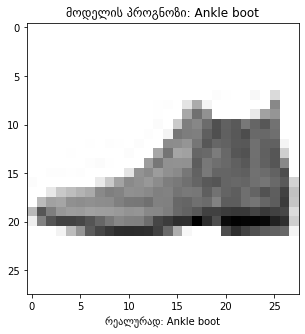

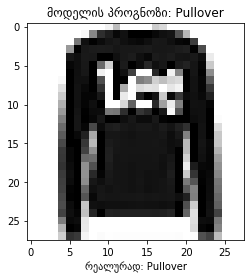

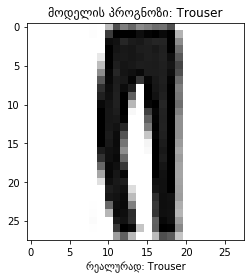

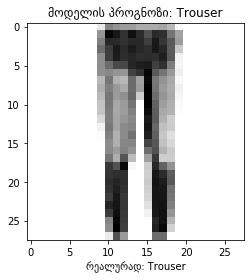

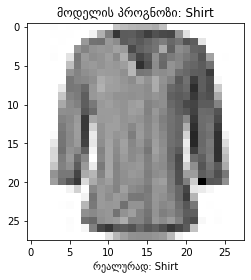

In [15]:
#მოდელის მიერ შესრულებული პროგნოზი შენახულია predictions ცვლადში და matpolotlib.pyplot_ის დამხარებით შეგვიძლია მისი ვიზუალიზაცია

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(5,5))
for i in range(5): #მეტი სურათის სანახავად შეგიძლია ეს რიცხვი შეცვალოთ.
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("რეალურად: " + class_names[test_labels[i]])
    plt.title("მოდელის პროგნოზი: " + class_names[np.argmax(predictions[i])])
    plt.show()

